   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✍️ Enter your text here for translation:
Hello All

🔍 Detected Language Code: en

🌐 Available Output Languages:
eng_Latn → English
fra_Latn → French
hin_Deva → Hindi
spa_Latn → Spanish
deu_Latn → German
tam_Taml → Tamil
tel_Telu → Telugu
jpn_Jpan → Japanese
zho_Hans → Chinese
arb_Arab → Arabic
san_Deva → Sanskrit

🔤 Enter target language code (e.g., eng_Latn): tam_Taml

📜 Text to Translate:
Hello All

🌍 Source Language: eng_Latn → Target Language: tam_Taml

✅ Translation Complete!

🔸 Translated Text:

வணக்கம் அனைவருக்கும்


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🔎 Searching for similar Sanskrit knowledge...

🔍 Top Semantic Matches:

1. धर्म एव हतो हन्ति धर्मो रक्षति रक्षितः
   Similarity Score: 12.0204

2. Balance of Tridosha is health – Ayurveda principle
   Similarity Score: 25.8776

3. Jyotisha links planetary motion with life patterns
   Similarity Score: 27.2996


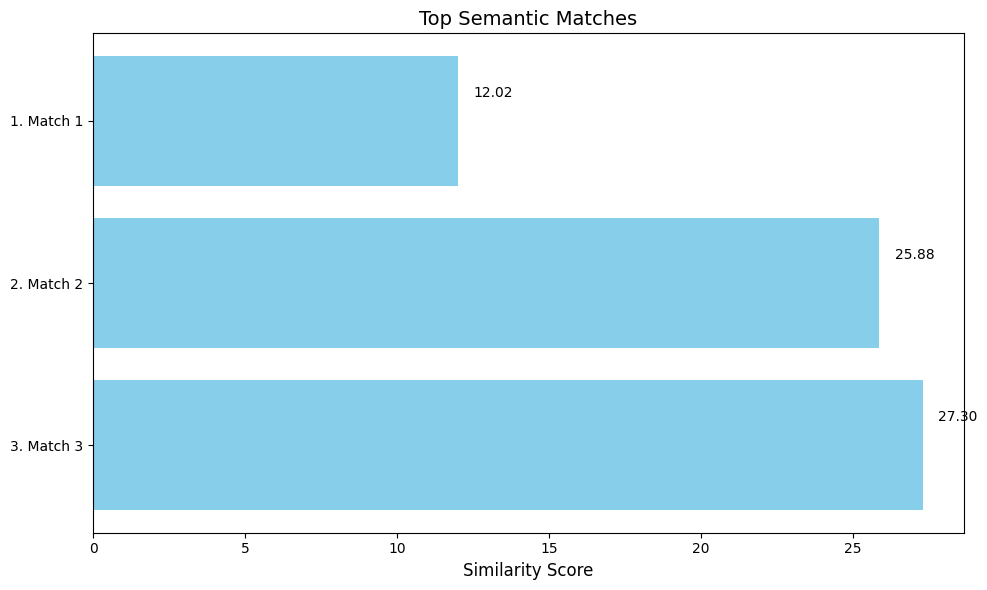

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📘 Enter correct human translation (for BLEU evaluation): Vanakkam

📏 BLEU Score: 0.00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://7f292ee2bc2b2bc353.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

# Install Required Libraries
!pip install -q transformers sentencepiece sentence-transformers faiss-cpu sacrebleu gradio

# Import Libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForSeq2SeqLM
from sentence_transformers import SentenceTransformer
import torch
import torch.nn.functional as F
import faiss
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# Load Models
lang_detect_model = AutoModelForSequenceClassification.from_pretrained("papluca/xlm-roberta-base-language-detection")
lang_detect_tokenizer = AutoTokenizer.from_pretrained("papluca/xlm-roberta-base-language-detection")
trans_model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")
trans_tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")
embed_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Language Code Mappings
id2lang = lang_detect_model.config.id2label

nllb_langs = {
    "eng_Latn": "English", "fra_Latn": "French", "hin_Deva": "Hindi",
    "spa_Latn": "Spanish", "deu_Latn": "German", "tam_Taml": "Tamil",
    "tel_Telu": "Telugu", "jpn_Jpan": "Japanese", "zho_Hans": "Chinese",
    "arb_Arab": "Arabic", "san_Deva": "Sanskrit"
}

xlm_to_nllb = {
    "en": "eng_Latn", "fr": "fra_Latn", "hi": "hin_Deva", "es": "spa_Latn", "de": "deu_Latn",
    "ta": "tam_Taml", "te": "tel_Telu", "ja": "jpn_Jpan", "zh": "zho_Hans", "ar": "arb_Arab",
    "sa": "san_Deva"
}

# Get input directly
input_text = input("✍️ Enter your text here for translation:\n").strip()

if not input_text:
    print("🚫 No input text provided. Exiting.")
    raise SystemExit

# Language detection
def detect_language(text):
    inputs = lang_detect_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = lang_detect_model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)
        pred = torch.argmax(probs, dim=1).item()
    return id2lang[pred]

if input_text.strip():
    detected_lang = detect_language(input_text)
    print(f"\n🔍 Detected Language Code: {detected_lang}")
else:
    print("🚫 Empty input text. Exiting.")
    raise SystemExit

# Choose target language
print("\n🌐 Available Output Languages:")
for code, lang in nllb_langs.items():
    print(f"{code} → {lang}")

target_code = input("\n🔤 Enter target language code (e.g., eng_Latn): ").strip()
if target_code not in nllb_langs:
    print("❌ Invalid code. Defaulting to English (eng_Latn).")
    target_code = "eng_Latn"

# Translation
def translate(text, src_code, tgt_code):
    trans_tokenizer.src_lang = src_code
    encoded = trans_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    try:
        target_lang_id = trans_tokenizer.convert_tokens_to_ids([tgt_code])[0]
        generated = trans_model.generate(**encoded, forced_bos_token_id=target_lang_id)
        return trans_tokenizer.decode(generated[0], skip_special_tokens=True)
    except:
        print("❌ Translation failed.")
        return ""

src_nllb = xlm_to_nllb.get(detected_lang, "eng_Latn")
print(f"\n📜 Text to Translate:\n{input_text}\n")
print(f"🌍 Source Language: {src_nllb} → Target Language: {target_code}")

translated_text = translate(input_text, src_nllb, target_code)
# Output translated text
if translated_text.strip():
    print("\n✅ Translation Complete!\n")
    print("🔸 Translated Text:\n")
    print(translated_text)

    with open("translated_output.txt", "w", encoding="utf-8") as f:
        f.write(translated_text)
    files.download("translated_output.txt")
else:
    print("❌ No translated text produced.")
    raise SystemExit

#Create Corpus and FAISS Index
corpus = [
    "धर्म एव हतो हन्ति धर्मो रक्षति रक्षितः",
    "Dharma when destroyed, destroys; when protected, protects.",
    "The moon affects tides and mood, according to Jyotisha",
    "One should eat according to the season – Rituacharya",
    "Balance of Tridosha is health – Ayurveda principle",
    "Ethics in Mahabharata reflect situational dharma",
    "Meditation improves memory and mental clarity",
    "Jyotisha links planetary motion with life patterns"
]

corpus_embeddings = embed_model.encode(corpus, convert_to_numpy=True)
dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(corpus_embeddings)


# Semantic Search Function
def search_semantic(query, top_k=3):
    query_embedding = embed_model.encode([query])
    distances, indices = index.search(query_embedding, top_k)
    return [(corpus[i], float(distances[0][idx])) for idx, i in enumerate(indices[0])]

# Perform Semantic Search
print("\n🔎 Searching for similar Sanskrit knowledge...")
results = search_semantic(translated_text)

print("\n🔍 Top Semantic Matches:")
for i, (text, score) in enumerate(results, 1):
    print(f"\n{i}. {text}\n   Similarity Score: {score:.4f}")

# Visualize Semantic Scores
labels = [f"{i+1}. Match {i+1}" for i in range(len(results))]
scores = [score for _, score in results]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color="skyblue")

plt.xlabel("Similarity Score", fontsize=12)
plt.title("Top Semantic Matches", fontsize=14)
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + 0.25, f"{bar.get_width():.2f}", fontsize=10)

plt.tight_layout()
plt.savefig("semantic_similarity_plot.png")
plt.show()

files.download("semantic_similarity_plot.png")

# BLEU Score Evaluation
from sacrebleu import corpus_bleu

reference = input("📘 Enter correct human translation (for BLEU evaluation): ").strip()
if reference:
    bleu = corpus_bleu([translated_text], [[reference]])
    print(f"\n📏 BLEU Score: {bleu.score:.2f}")
else:
    print("ℹ️ BLEU evaluation skipped (no reference entered).")

# ✅ Gradio App Interface
import gradio as gr
import matplotlib.pyplot as plt
from sacrebleu import corpus_bleu

def full_pipeline(user_input_text, target_lang_code, human_ref=""):
    if not user_input_text.strip():
        return "⚠️ Empty input", "", [], "", ""

    detected_lang = detect_language(user_input_text)
    src_nllb = xlm_to_nllb.get(detected_lang, "eng_Latn")

    translated = translate(user_input_text, src_nllb, target_lang_code)
    if not translated:
        return detected_lang, "❌ Translation failed", [], "", ""

    sem_results = search_semantic(translated)
    result_list = [f"{i+1}. {txt} (Score: {score:.2f})" for i, (txt, score) in enumerate(sem_results)]

    labels = [f"{i+1}" for i in range(len(sem_results))]
    scores = [score for _, score in sem_results]
    plt.figure(figsize=(6, 4))
    bars = plt.barh(labels, scores, color="lightgreen")
    plt.xlabel("Similarity Score")
    plt.title("Top Semantic Matches")
    plt.gca().invert_yaxis()
    for bar in bars:
        plt.text(bar.get_width() + 0.01, bar.get_y() + 0.1, f"{bar.get_width():.2f}", fontsize=8)
    plt.tight_layout()
    plot_path = "/tmp/sem_plot.png"
    plt.savefig(plot_path)
    plt.close()

    bleu_score = ""
    if human_ref.strip():
        bleu = corpus_bleu([translated], [[human_ref]])
        bleu_score = f"{bleu.score:.2f}"

    return detected_lang, translated, result_list, plot_path, bleu_score

# 🚀 Launch Gradio Interface
gr.Interface(
    fn=full_pipeline,
    inputs=[
        gr.Textbox(label="Input Text", lines=4, placeholder="Enter text to translate..."),
        gr.Dropdown(label="Target Language", choices=list(nllb_langs.keys()), value="eng_Latn"),
        gr.Textbox(label="(Optional) Human Reference Translation", lines=2, placeholder="Paste human translation here (for BLEU)...")
    ],
    outputs=[
        gr.Textbox(label="Detected Language"),
        gr.Textbox(label="Translated Text"),
        gr.Textbox(label="Top Semantic Matches"),
        gr.Image(label="Semantic Similarity Plot"),
        gr.Textbox(label="BLEU Score")
    ],
    title="🌍 Multilingual Translator + Semantic Search",
    description="Detects language → Translates → Finds related Sanskrit concepts → BLEU optional."
).launch(debug=True)

